# The Scenario
Four people are standing in a circle. One person is holding a ball. Whoever is holding the ball can pass the ball either to their left or right i.e. Say person one is holding the ball, they can only pass it to person two or person four; person two can only pass it to person one or person three, etc. The game ends when everyone has touched the ball once. What is the probability that the game ends with the ball in the hands of person three?

In [25]:
import random as rd
import matplotlib.pyplot as plt
import scipy
import collections

In [26]:
# game ends when everyone has touched the ball
trials_vec = []
ls = [0,0,0,0] # flag - has person touched ball yet?
for i in range(100000):
    de = collections.deque([1, 2, 3,4])
    trials = 0
    while ls != [1,1,1,1]:
        walk = rd.choice([-1,1])
        de.rotate(walk)
        ls[de[0]-1] = 1
    if de[0] == 3:
        trials_vec.append(1)
    else:
        trials_vec.append(0)
    ls = [0,0,0,0]

In [27]:
scipy.mean(trials_vec)

<ipython-input-27-85918d3f2e19>:1: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  scipy.mean(trials_vec)


0.33181

<ipython-input-28-3ea6c8dc6ae2>:3: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  probs_convergence.append(scipy.mean(trials_vec[:i]))


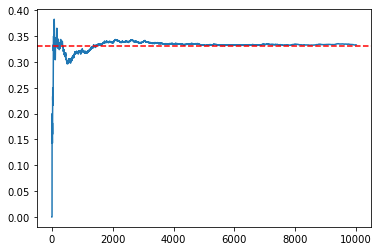

In [28]:
probs_convergence = []
for i in range(1,len(probs)):
    probs_convergence.append(scipy.mean(trials_vec[:i]))

plt.plot(range(1,10000),probs_convergence[:10000])
plt.axhline(y=.33, color='r', linestyle='--')